In [1]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer, StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('./data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Setting id as an index
data.set_index('id', append=True, inplace=True)

## Exploring null values, object types, and dropping irrelevant variables

In [6]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
data['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [8]:
data[data['view'].isna()].sample(5)

,,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,id,,,,,,,,,,,,,,,,,,,,
14526,3678900450,9/26/2014,615000.0,3,1.75,1900,3783,1.5,NO,NaN,Very Good,7 Average,1110,790.0,1927,NaN,98144,47.5742,-122.315,1530,5098
7716,3972900025,3/13/2015,499000.0,6,1.75,2400,7500,1.5,NO,NaN,Average,7 Average,1400,1000.0,1975,0.0,98155,47.7661,-122.313,1980,7500
21057,3448900290,8/28/2014,636230.0,4,2.50,2840,6284,2.0,NO,NaN,Average,9 Better,2840,0.0,2013,0.0,98056,47.5135,-122.169,2790,7168
7103,104540840,12/3/2014,240000.0,3,2.25,1460,5818,1.0,NO,NaN,Average,7 Average,1140,320.0,1986,NaN,98023,47.3113,-122.358,1490,6031
14657,1954700365,3/17/2015,860000.0,3,2.00,2090,4190,1.5,NO,NaN,Good,8 Good,1490,600.0,1930,NaN,98122,47.6178,-122.284,2090,6270


In [9]:
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [10]:
data[data['waterfront'].isna()].sample(5)

,,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,id,,,,,,,,,,,,,,,,,,,,
16732,1826049430,5/20/2014,372500.0,4,1.75,1590,10523,2.0,NaN,NONE,Good,7 Average,1590,0.0,1922,NaN,98133,47.7358,-122.342,1610,8568
10211,3293700496,12/4/2014,450000.0,4,1.75,1850,7730,1.0,NaN,NONE,Very Good,7 Average,1100,750.0,1956,0.0,98133,47.7481,-122.355,2260,8581
19760,8091670200,10/22/2014,408000.0,3,2.75,2670,4800,2.0,NaN,NONE,Average,8 Good,2670,0.0,2014,0.0,98038,47.3483,-122.042,2340,5000
16399,7852160080,1/21/2015,760000.0,4,3.50,3720,13591,2.0,NaN,GOOD,Average,10 Very Good,3720,0.0,2004,0.0,98065,47.5360,-121.858,4210,14282
12270,2591020560,7/2/2014,481015.0,3,2.25,1550,5511,2.0,NaN,NONE,Average,8 Good,1550,0.0,1987,0.0,98033,47.6946,-122.185,1620,5511


### Addressing null values in `waterfront` and  `view`:
I used Google Maps and looked at a small sample of homes that have null values in `waterfront` or `view`. It's apparent that these homes are not on a waterfront or do not have a noteable view, respectively. I can fill in their values accordingly.

In [11]:
data['waterfront'].fillna('NO', inplace=True)
data['view'].fillna('NONE', inplace=True)

### Addresing null values in `yr_renovated`:


In [12]:
(data['yr_renovated'].isna()).sum()

3842

In [13]:
(data['yr_renovated'] == 0).sum()

17011

This column has 3,842 null values. Additionally, 17,011 records have a `yr_renovated` of 0, which is asssumed to mean the home wasn't renovated. Together, these amount to over 96% of the data.

Rather than impute these values with some number, we can make a new column that tells us whether the home was reonavated in the last 20 years.

In [14]:
yr_renovated = data['yr_renovated']
data.drop('yr_renovated', inplace=True, axis=1)

In [15]:
data['renovated_last_20'] = yr_renovated.isin(range(1995, 2016))
data['renovated_last_20'] = data['renovated_last_20'].map({True: 'Yes', False: 'No'})
# Keeping this as a string for now in order to group it with categorical variables later.
data.head(3)

,,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_20
,id,,,,,,,,,,,,,,,,,,,,
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,No
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,No


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21597 entries, (0, 7129300520) to (21596, 1523300157)
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               21597 non-null  object 
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   waterfront         21597 non-null  object 
 8   view               21597 non-null  object 
 9   condition          21597 non-null  object 
 10  grade              21597 non-null  object 
 11  sqft_above         21597 non-null  int64  
 12  sqft_basement      21597 non-null  object 
 13  yr_built           21597 non-null  int64  
 14  zipcode            21597 non-null  int64  
 15  lat                21597 non-null  float64

### Why is `sqft_basement` an object type?

In [17]:
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [18]:
data['sqft_basement'].value_counts(normalize=True, ascending=False)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1920.0    0.000046
3480.0    0.000046
2730.0    0.000046
2720.0    0.000046
248.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

The values in `sqft_basement` are strings. I have to deal with values of '0.0' and '?' It is unclear whether these values mean there is no basement, there is a basemeny but it's unfinished, or something else. Rather than make any unsafe assumptions, I will drop this column, as well as `sqft_above`.

In [19]:
data.drop(['sqft_basement', 'sqft_above'], axis=1, inplace=True)

In [20]:
data.head(3)

,,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_20
,id,,,,,,,,,,,,,,,,,,
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1955,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,1951,98125,47.7210,-122.319,1690,7639,No
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,1933,98028,47.7379,-122.233,2720,8062,No


### Converting `yr_built` to `age`

In [21]:
yr_built = data['yr_built']
data['age'] = 2015 - yr_built
data.drop('yr_built', axis=1, inplace=True)

### Bulk dropping columns:

The following variables either can't be changed by someone selling their home or don't provide much useful information. As for `date`, all homes in this dataset were sold between May 2014 and May 2015.

* `date`
* `zipcode`
* `lat`
* `long`
* `sqft_living15`
* `sqft_lot15`

In [22]:
data.drop(
    ['date',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'],
    
    axis=1,
    inplace=True
)

### Unclear: 
#### Should `condition` and `grade` be treated as categorical variables or translated into discrete, numeric variables?

In [23]:
# data.head(3)

In [24]:
# data['condition'].value_counts()

In [25]:
# data['grade'].value_counts()

In [26]:
# condition = data['condition']

# condition_dict = {
#     'Poor': 1,
#     'Fair': 2,
#     'Average': 3,
#     'Good': 4,
#     'Very Good': 5
# }

# data['condition'] = condition.map(condition_dict)

In [27]:
# grade = data['grade']

# data['grade'] = [int(grade.iloc[i][0]) for i in range(len(data['grade']))]

In [28]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# axes[0].hist(data['condition'])
# axes[0].set_xlabel('Condition')
# axes[1].hist(data['grade'])
# axes[1].set_xlabel('Grade');

In [29]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# axes[0].scatter(x=data['condition'], y=data['price'])
# axes[0].set_xlabel('Condition')
# axes[1].scatter(x=data['grade'], y=data['price'])
# axes[1].set_xlabel('Grade');

## Checking for linear relationships with `price` and collinearity of predictors

In [30]:
data.head()

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovated_last_20,age
,id,,,,,,,,,,,,
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,No,60
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,No,64
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,No,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,No,50
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,No,28


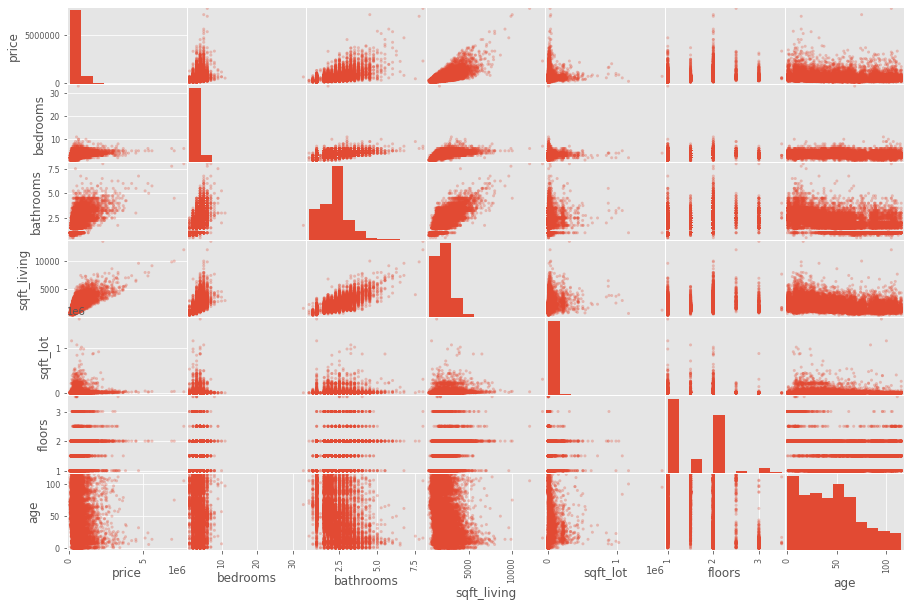

In [31]:
pd.plotting.scatter_matrix(data, figsize=(15,10), alpha=.3);

In [32]:
# Removing an outlier with 33 bedrooms
# (Probably a data entry error)
data[data['bedrooms'] > 20]

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovated_last_20,age
,id,,,,,,,,,,,,
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,No,68


In [33]:
data.drop(index=15856, inplace=True)

#### Which variables have a clear linear relationship with `price`?

* Going off of visuals alone, it's ambiguous. `sqft_living` and `bathrooms` appear to have the strongest linear relationship with `price`, although even those plot have a conical shapes.
* It's also apparent that I may benefit from log-transforming some variables.

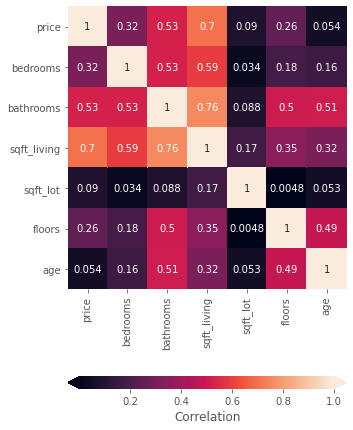

In [34]:
fig, ax = plt.subplots(figsize = (5,8))

sns.heatmap(
    data.corr().abs(),
#     mask=np.triu(np.ones_like(data.corr(), dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

**The strongest correlation with `price` is `sqft_living`. I can likely use this variable for my baseline model.**

**Which variables have high collinearity?**

In [35]:
# Checking for collinarity of all combinations of predictors

data_pred = data.drop('price', axis=1)

pred_corr = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
pred_corr['pairs'] = list(zip(pred_corr.level_0, pred_corr.level_1))
pred_corr.rename(columns={0: 'Coefficient'}, inplace=True)
pred_corr.set_index('pairs', inplace=True)
pred_corr.drop(columns=['level_1', 'level_0'], inplace = True)
pred_corr.drop_duplicates(inplace=True)
pred_corr

,Coefficient
pairs,
"(bedrooms, bedrooms)",1.000000
"(bathrooms, sqft_living)",0.755755
"(sqft_living, bedrooms)",0.593178
"(bathrooms, bedrooms)",0.527870
"(age, bathrooms)",0.507166
"(bathrooms, floors)",0.502574
"(floors, age)",0.489175
"(sqft_living, floors)",0.353941
"(sqft_living, age)",0.318140


**`bathrooms` and `sqft_living` have a high collinearity of over 0.75. One of them will likely have to be excluded from the model.**

## Dealing with categorical variables

In [36]:
# Saving a copy of the dataset in its current state just in case
data_before_dummies = data.copy()

In [37]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'renovated_last_20', 'age'],
      dtype='object')

In [38]:
data_num = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'age']]
data_cat = data[['waterfront', 'view', 'condition', 'grade', 'renovated_last_20']]

In [39]:
data_cat_dummies = pd.get_dummies(data_cat, drop_first=True)
data_cat_dummies.rename(columns={'waterfront_YES': 'waterfront', 
                                 'renovated_last_20_Yes': 'renovated_last_20'},
                       inplace=True)
data_cat_dummies = data_cat_dummies.astype(int)

In [40]:
data = pd.concat([data_num, data_cat_dummies], axis=1)

## Model 1
#### A very crude, baseline model.
For the baseline model, I will only include `sqft_living` as a predictor, since it has the the highest correlation and clearest linear relationship with `price`.

In [41]:
y = data['price']
X = data['sqft_living']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

C:\Users\zshoo\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:54:50   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**An R^2 of .493 is not great**

**A Durbin-Watson score of 1.982 shows that the residuals are homoskedastic, satisfying that condition.**

**Checking normality of redisuals:**

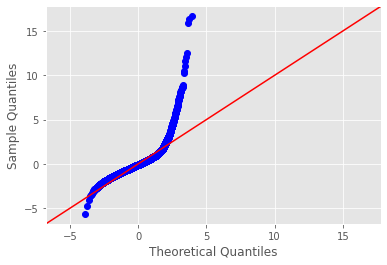

In [42]:
sm.graphics.qqplot(model.resid, line='45', fit=True);

**The condition of normality of residuals is clearly violated.**

**What if I log-transformed `sqft_living` and `price`?**

In [43]:
y = np.log(data['price'])
X = np.log(data['sqft_living'])
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

C:\Users\zshoo\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:54:51   Log-Likelihood:                -10230.
No. Observations:               21596   AIC:                         2.046e+04
Df Residuals:                   21594   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7232      0.047    142.609      0.000       6.631       6.816
sqft_living     0.8377      0.006    134.372      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.586   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.131
Skew:                           0.143   Prob(JB):                     1.65e-25
Kurtosis:                       2.788   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

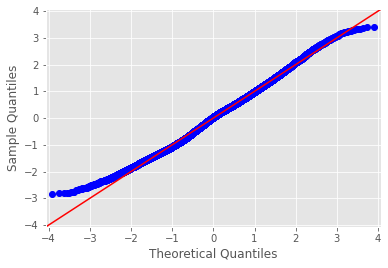

In [44]:
sm.graphics.qqplot(model.resid, line='45', fit=True);

**That improved the normality assumption, but the R^2 score is still quite low.**

In [71]:
y = np.log(data['price'])
X = pd.concat([np.log(data['sqft_living']), data['waterfront']], axis=1)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

C:\Users\zshoo\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     9546.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:00:35   Log-Likelihood:                -9951.0
No. Observations:               21596   AIC:                         1.991e+04
Df Residuals:                   21593   BIC:                         1.993e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8055      0.047    145.825      0.000       6.714       6.897
sqft_living     0.8261      0.006    133.816      0.000       0.814       0.838
waterfront      0.7596      0.032     23.771      0.000       0.697       0.822
==============================================================================
Omnibus:                      120.378   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.030
Skew:                           0.099   Prob(JB):                     3.13e-22
Kurtosis:                       2.733   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

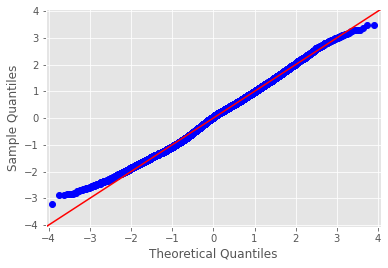

In [69]:
sm.graphics.qqplot(model.resid, line='45', fit=True);

In [ ]:
###

In [ ]:
def standardize(data):
    num = (data - np.mean(data))
    denom = np.std(data)
    return num/denom